/usr/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in log


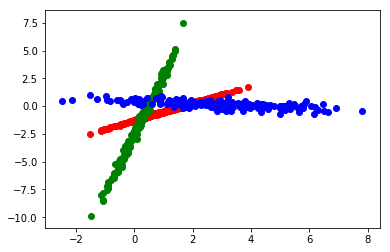

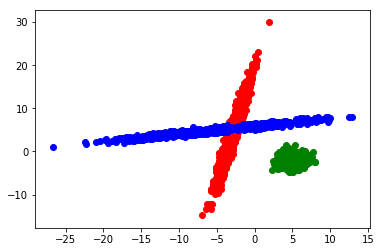

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.stats import multivariate_normal


def update(cluster,p,centroid,mc,k,Y):
    for x in Y:
        min = 10000
        n = -1
        for i in range(0,k):
            var = multivariate_normal(mean=centroid[i], cov=mc[i])
            val = -np.log(p[i])-np.log(var.pdf(x))
            if(val<min):
                min = val
                n = i
        cluster[n].append(x)

def lloyd(k, eps, Y):
    centroid = []
    p = []
    mc = []
    pom = np.array(Y).T
    #init
    for i in range(k):
        centroid.append(Y[randint(0,len(Y))])
        p.append(1/k)
        mc.append(np.cov(pom))
    
    flag = False
    while True: 
        h2 = 0
        #clear
        cluster = []  
        for _ in range(k):
            cluster.append([])
        update(cluster, p, centroid, mc, k,Y)
        
        #remove
        i = 0
        while(i==k):
            if(len(cluster[i]) < 0.01*len(Y)):
                r = cluster[i]
                del cluster[i], p[i], centroid[i], mc[i]
                update(cluster, p, centroid, mc, k, r)
                i = 0
                k-=1
            else:
                i+=1
                
        #update    
        for i in range(k):
            centroid[i] = np.sum(cluster[i],axis=0)/len(cluster[i])
            pom = np.array(cluster[i]).T
            mc[i] = np.cov(pom)
            p[i] = len(cluster[i])/len(Y)
            h2=h2+p[i]*(-np.log(p[i])+1/2*np.log(np.linalg.det(mc[i]))+len(Y)/2*np.log(2*np.pi*np.e)) 
        
        if flag and h2>h1-eps:
            break
    
        flag = True
        h1 = h2
    return cluster


def show(k, eps, addr):
    data = np.loadtxt(addr, delimiter = ' ')
    result = lloyd(3, 0.0001, data)
    colormap = np.array(['red', 'green', 'blue'])
    for i, arr in enumerate (result):
        for x in arr:
            plt.scatter(x[0],x[1],c=colormap[i])   
    plt.show()

show(3, 0.0001, "data8(1).txt")
show(3, 0.0001, "data8(2).txt")